# Regressão Bagging and Bossting

In [32]:
#importando as bibliotecas necessarias para realizar a regressão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor

In [19]:
#lendo a base de dados
df = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\ML 2\projetoML2\data\diamonds.csv')

In [20]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
#jogando fora as colunas x,y e z pelo fato de serem muito coorelacionadas com o carat, e a primeira coluna que é o index
df = df.drop(['x','y','z','Unnamed: 0'], axis=1)

In [23]:
#using ordinal encoding to encode the categorical variables
ordinal_encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good','Premium','Ideal']])

df['cut'] = ordinal_encoder.fit_transform(df[['cut']])


In [24]:
#using ordinal encoding for the rest of variables
ordinal_encoder = OrdinalEncoder(categories=[['D', 'E', 'F', 'G', 'H', 'I', 'J']])

df['color'] = ordinal_encoder.fit_transform(df[['color']])

In [25]:
#using ordinal encoding for the rest of variables
ordinal_encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

df['clarity'] = ordinal_encoder.fit_transform(df[['clarity']])

In [26]:
#separando o data frame em x e y
X = df.drop('price', axis=1)
y = df['price']

In [27]:
#separando o dado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# criando o modelo de regressão com Bagging
bagging_regressor = BaggingRegressor(n_estimators=50, random_state=42)

In [34]:
# treinando o modelo
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(n_estimators=50, random_state=42)

In [35]:
# realizando previsões
y_pred_train = bagging_regressor.predict(X_train)
y_pred_test = bagging_regressor.predict(X_test)

In [36]:
# avaliando o modelo
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

Train MSE: 45568.39
Test MSE: 308688.38
Train R²: 1.00
Test R²: 0.98


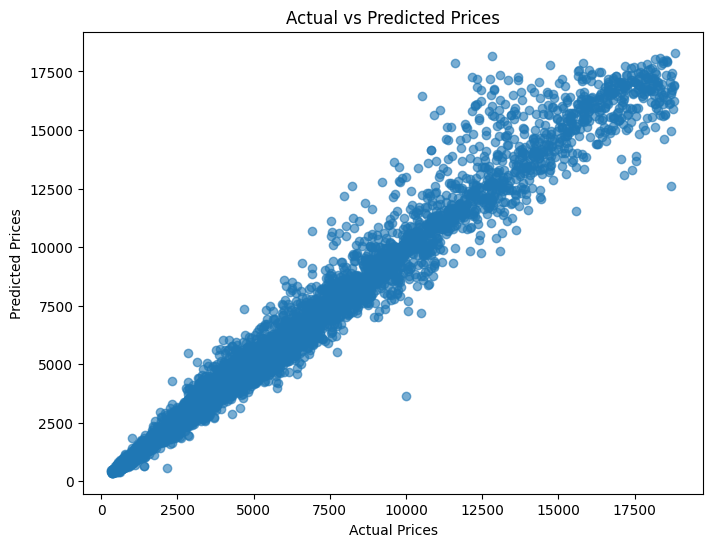

In [37]:
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")

# plotando os resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()